# PLAN DE TRABAJO: Aplicaciones móviles: 
<b><font color='blue'>Segmentación de usuarios(as) en función del comportamiento </font></b>


## Objetivo
Tomar las acciones realizadas en la aplicación para definir grupos que difieren en términos de métricas del producto:
* tasa de retención,
* tiempo dedicado a la aplicación,
* frecuencia de ocurrencia de eventos,
* conversión en el evento de destino → contacts_show.

## Descripción de los datos
Los datasets contienen datos sobre los eventos que ocurrieron en la aplicación móvil <b><font color='blue'>Trash to Treasure</font></b>, en la que  usuari#s publican anuncios para vender cosas que ya no necesitan.

Los datos corresponden a quienes realizaron sus primeras acciones en la aplicación del 7 de octubre de 2019 al 03 de noviembre de 2019, o a favoritos

### mobile_dataset_us.csv contiene las siguientes columnas:
* user.id
* event.time: cuando tuvo lugar el evento,
* event.name: Los posibles eventos son:
    * advert_open: abrir una publicación publicitaria,
    * photos_show: ver fotos en el anuncio,
    * tips_show: se mostraron anuncios recomendados a usuari@,
    * tips_click: Usuari@ hizo clic en un anuncio recomendado,
    * map: Usuari@ abrió el mapa de los anuncios publicados
    * search_1 - search_7: varios eventos relacionados con la búsqueda en el sitio web
    * favorites_add: el usuario o la usuaria agregó el anuncio a favoritos*
    * contacts_show y show_contacts (duplicados implicitos): Usuari@ hizo clic en el botón "mostrar número de teléfono" en el anuncio,
    * contacts_call: Usuari@ marcó el número del anuncio

### mobile_sources_us.csv contiene las siguientes columnas:
* userId: ID de usuario/a
* source: la fuente desde la cual el usuario o la usuaria descargó la aplicación

# Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA Inicial: Análisis Exploratorio de Datos

## mobile_sources_us

In [2]:
# lee los datos
sources = pd.read_csv('mobile_sources_us.csv')                    # Desarrollo local
# sources = pd.read_csv('/datasets/mobile_sources_us.csv')            # Desarrollo en plataforma de revisión de código 

sources.shape

(4293, 2)

In [3]:
sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


## mobile_dataset_us

In [4]:
# lee los datos
dataset = pd.read_csv('mobile_dataset_us.csv')                      # Desarrollo local
# dataset = pd.read_csv('/datasets/mobile_dataset_us.csv')            # Desarrollo en plataforma de revisión de código 

dataset.shape

(74197, 3)

In [5]:
dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [6]:
dataset[dataset['user.id']=='00551e79-152e-4441-9cf7-565d7eb04090'].sort_values(by='event.time', ascending=True)

,event.time,event.name,user.id
47688,2019-10-25 16:44:41.263364,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090
47689,2019-10-25 16:44:44.786860,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090
55802,2019-10-28 13:08:15.809056,search_1,00551e79-152e-4441-9cf7-565d7eb04090
55811,2019-10-28 13:10:40.331441,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090
55813,2019-10-28 13:10:49.415326,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090
55844,2019-10-28 13:17:17.259411,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090
55845,2019-10-28 13:17:31.950103,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090
58047,2019-10-29 02:17:12.342406,photos_show,00551e79-152e-4441-9cf7-565d7eb04090


# Preprocesamiento

<div class="alert alert-block alert-info">

* Complementar/combinar "dataset" con la información de "sources"
* Combinar dataset para consolidar información: Adicionar al dataset mobile_dataset_us la fuente ("source") de cada user.id según consulta en la tabla mobile_sources_us
* Agrupar por categorias (Categorizar) los eventos:
    * ingreso: advert_open.
    * busqueda: photos_show, tips_show, tips_click, map, search_1 a search_7 y favorites_add.
    * evento_destino: contacts_show
    * evento_final: contacts_call
</div>

## Cambiar nombre de columnas
Los nombre de llave primaria de mobile_sources_us (userId) y llave foranea en mobile_dataset_us (user.Id) deben coincidir,

In [7]:
sources= sources.rename(columns={'userId':'user_id'})
sources

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,bing
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,bing
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,bing
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,bing


In [8]:
events = dataset.copy()
events = events.rename(columns={'user.id':'user_id'})
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user_id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [9]:
events.head()

,event.time,event.name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


## Cambiar tipo de dato a la columna event.time

In [10]:
# 1. Cambiar el tipo de registros de 'event.time' a datetime
events['event.time'] = pd.to_datetime(events['event.time'])

# 2. Extraer solo la información de año, mes y día
events['event.time'] = events['event.time'].dt.strftime('%Y-%m-%d')

events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user_id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [11]:
events.head()

,event.time,event.name,user_id
0,2019-10-07,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


## Tratar duplicados implicitos

In [12]:
resumen_eventos = events['event.name'].value_counts()
resumen_eventos.sort_index()

event.name
advert_open       6164
contacts_call      541
contacts_show     4450
favorites_add     1417
map               3881
photos_show      10012
search_1          3506
search_2           324
search_3           522
search_4           701
search_5          1049
search_6           460
search_7           222
show_contacts       79
tips_click         814
tips_show        40055
Name: count, dtype: int64

<div class="alert alert-block alert-info">

Se deben unificar "show_contacts" a "contacts_show"
</div>

In [13]:
events['event.name'] = events['event.name'].replace('show_contacts','contacts_show')
resumen_eventos2 = events['event.name'].value_counts().sort_index()
resumen_eventos2

event.name
advert_open       6164
contacts_call      541
contacts_show     4529
favorites_add     1417
map               3881
photos_show      10012
search_1          3506
search_2           324
search_3           522
search_4           701
search_5          1049
search_6           460
search_7           222
tips_click         814
tips_show        40055
Name: count, dtype: int64

## Complementar información en dataset de eventos

In [14]:
# 1. Agrega una columna con la fuente del usuario
# 2. Combina las dos tablas utilizando merge en el campo 'user_id'
events_full_data = pd.merge(events, sources, on='user_id')
events_full_data

,event.time,event.name,user_id,source
0,2019-10-07,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
3,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
...,...,...,...,...
74192,2019-11-03,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74193,2019-11-03,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74194,2019-11-03,search_1,20850c8f-4135-4059-b13b-198d3ac59902,google
74195,2019-11-03,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google


## Categorizar eventos

In [15]:
events_full_data['event.name'].value_counts().sort_index()

event.name
advert_open       6164
contacts_call      541
contacts_show     4529
favorites_add     1417
map               3881
photos_show      10012
search_1          3506
search_2           324
search_3           522
search_4           701
search_5          1049
search_6           460
search_7           222
tips_click         814
tips_show        40055
Name: count, dtype: int64

In [16]:
events_full_data['event.name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7'], dtype=object)

<div class="alert alert-block alert-danger">

Hay que copiar previamente en otro dataset para poder calcular la tasa de retención?
</div>

In [17]:
# Función para consolidar las "actividades" como una sola categoría

Items_a_cambiar = ['advert_open', 'tips_show', 'map', 'search_4', 'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2', 'search_3', 'favorites_add', 'search_6', 'search_7']

# Nueva columna aplicando función
events_full_data['event_category'] = events_full_data['event.name'].apply(lambda x: 'activity' if x in Items_a_cambiar else x)

# DataFrame resultante
events_full_data.head(10)

,event.time,event.name,user_id,source,event_category
0,2019-10-07,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,activity
1,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,activity
2,2019-10-07,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing,activity
3,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,activity
4,2019-10-07,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing,activity
5,2019-10-07,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing,activity
6,2019-10-07,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,activity
7,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,activity
8,2019-10-07,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing,activity
9,2019-10-07,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,activity


# EDA Final: Análisis Exploratorio de Información

## Cantidad de eventos por categoría. 

### Forma 1

In [18]:
events_full_data['event_category'].unique()

array(['activity', 'contacts_show', 'contacts_call'], dtype=object)

In [19]:
# cantidad total de eventos advert_open
cant_01_advert_open = events_full_data[events_full_data['event_category'] == 'advert_open']['event_category'].count()
print(f'cantidad de veces que los usuarios abrieron la publicación publicitaria: {cant_01_advert_open}')

cantidad de veces que los usuarios abrieron la publicación publicitaria: 0


In [20]:
# cantidad total de actividades
cant_02_activity = events_full_data[events_full_data['event_category'] == 'activity']['event_category'].count()
print(f'cantidad de actividades de los usuarios: {cant_02_activity}')

cantidad de actividades de los usuarios: 69127


In [21]:
# cantidad total de eventos contact_show
cant_03_contacts_show = events_full_data[events_full_data['event_category'] == 'contacts_show']['event_category'].count()
print(f'cantidad de veces que los usuarios hicieron clic en el botón "mostrar número de teléfono" en el anuncio: {cant_03_contacts_show}')

cantidad de veces que los usuarios hicieron clic en el botón "mostrar número de teléfono" en el anuncio: 4529


In [22]:
cant_04_contacts_call = events_full_data[events_full_data['event_category'] == 'contacts_call']['event_category'].count()
print(f'cantidad de veces que los usuarios marcaron el número del anuncio: {cant_04_contacts_call}')

cantidad de veces que los usuarios marcaron el número del anuncio: 541


### Forma 2

In [23]:
# Resumen de clicks por tipo
events_by_category = events_full_data['event_category'].value_counts()
print('Resumen de clicks por tipo:\n')
print(events_by_category)

Resumen de clicks por tipo:

event_category
activity         69127
contacts_show     4529
contacts_call      541
Name: count, dtype: int64


In [24]:
# convertir la tabla en Dataframe
events_by_category = events_by_category.reset_index()
events_by_category

,event_category,count
0,activity,69127
1,contacts_show,4529
2,contacts_call,541


In [25]:
# Imprimir valores
cant_activity = events_by_category.loc[events_by_category['event_category'] == 'activity', 'count'].values[0]
cant_contacts_show = events_by_category.loc[events_by_category['event_category'] == 'contacts_show', 'count'].values[0]
cant_contacts_call = events_by_category.loc[events_by_category['event_category'] == 'contacts_call', 'count'].values[0]

print("Cantidad de registros de actividad es: ", cant_activity)
print("Cantidad de registros de contacts_show es: ", cant_contacts_show)
print("Cantidad de registros de contacts_call es: ", cant_contacts_call)


Cantidad de registros de actividad es:  69127
Cantidad de registros de contacts_show es:  4529
Cantidad de registros de contacts_call es:  541


### Forma 3

In [26]:
def get_cantidad_registros(events_by_category, categoria):
    return events_by_category.loc[events_by_category['event_category'] == categoria, 'count'].values[0]
    
# Lista de categorías
categorias = ['activity', 'contacts_show', 'contacts_call']

# Imprimir valores
for categoria in categorias:
    cantidad_registros = get_cantidad_registros(events_by_category, categoria)
    print(f"Cantidad de registros de {categoria} es: {cantidad_registros}")

Cantidad de registros de activity es: 69127
Cantidad de registros de contacts_show es: 4529
Cantidad de registros de contacts_call es: 541


### Forma 4

In [27]:
# Resumen de transacciones clasificadas por eventos y fuentes
# Consolidación de datos en tabla dinámica
table_01 = events_full_data.pivot_table(index='event_category', columns='source', values='event.time',aggfunc='count') 
dataset_01 = table_01.reset_index()
dataset_01

source,event_category,bing,google,other
0,activity,32025,18842,18260
1,contacts_call,226,163,152
2,contacts_show,2035,1440,1054


In [28]:
dataset_01t = dataset_01.copy()
dataset_01t['total'] = dataset_01[['bing', 'google', 'other']].sum(axis=1)
dataset_01t = dataset_01t.sort_values(by='total', ascending=False)
dataset_01t

source,event_category,bing,google,other,total
0,activity,32025,18842,18260,69127
2,contacts_show,2035,1440,1054,4529
1,contacts_call,226,163,152,541


### Gráficas de eventos por categoría

In [29]:
# Configurar el DataFrame para tener 'event_category' como índice
dataset_01.set_index('event_category', inplace=True)

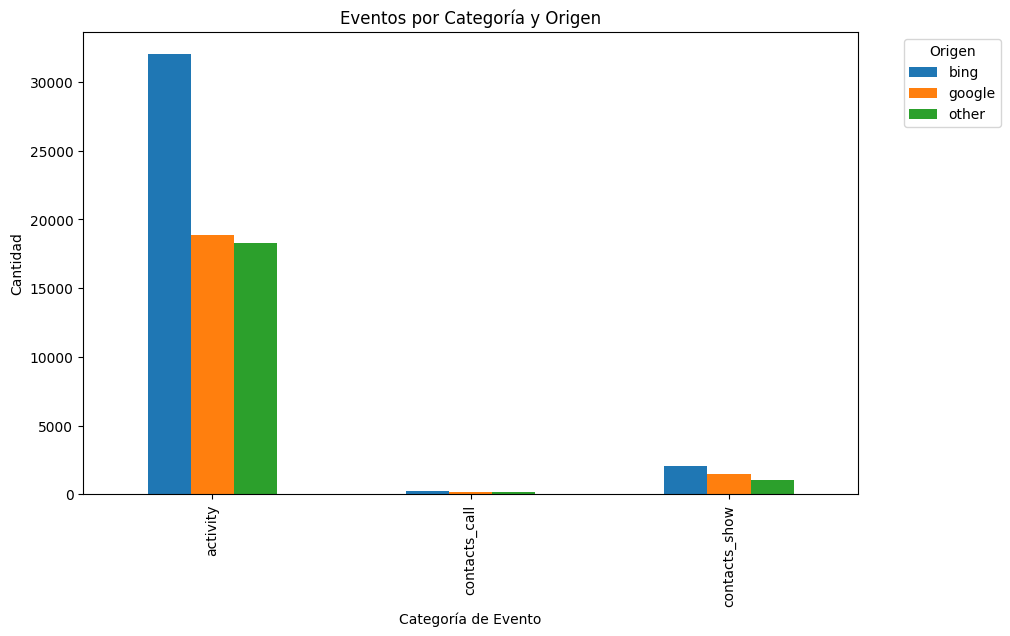

In [45]:
# Graficar usando Pandas
ax = dataset_01.plot(kind='bar', stacked=False, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Eventos por Categoría y Origen')
plt.xlabel('Categoría de Evento')
plt.ylabel('Cantidad')
plt.legend(title='Origen', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

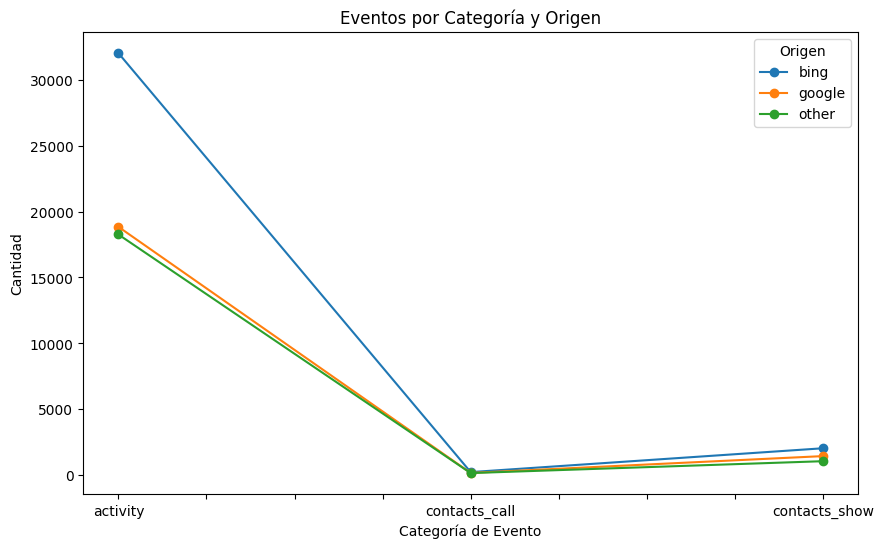

In [31]:
# Graficar usando Pandas
ax = dataset_01.plot(kind='line', marker='o', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Eventos por Categoría y Origen')
plt.xlabel('Categoría de Evento')
plt.ylabel('Cantidad')
plt.legend(title='Origen')

# Mostrar el gráfico
plt.show()

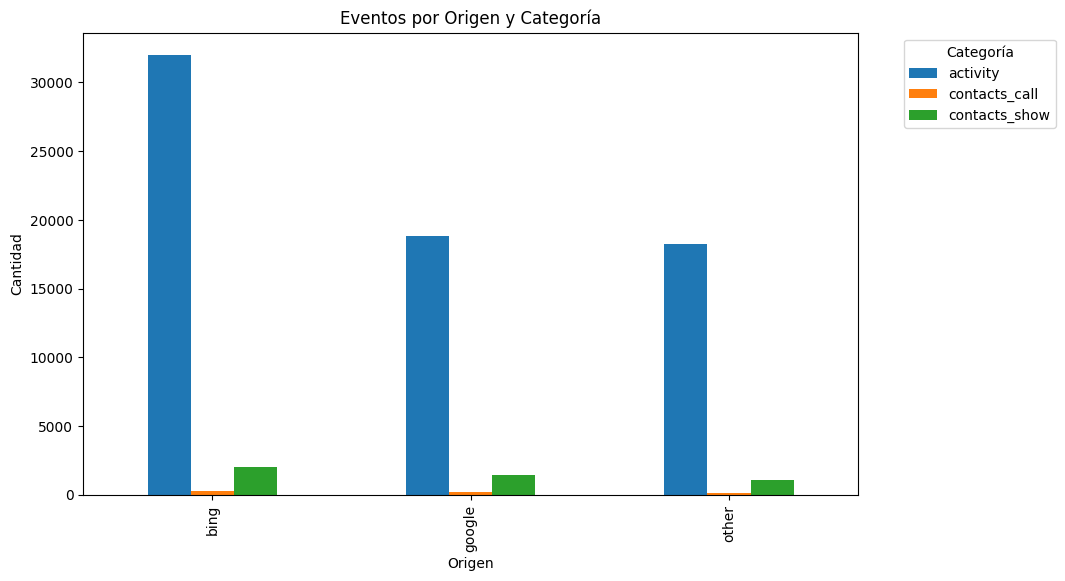

In [46]:
# Transponer el DataFrame
df_transposed = dataset_01.transpose()

# Graficar usando Pandas
ax = df_transposed.plot(kind='bar', stacked=False, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Eventos por Origen y Categoría')
plt.xlabel('Origen')
plt.ylabel('Cantidad')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

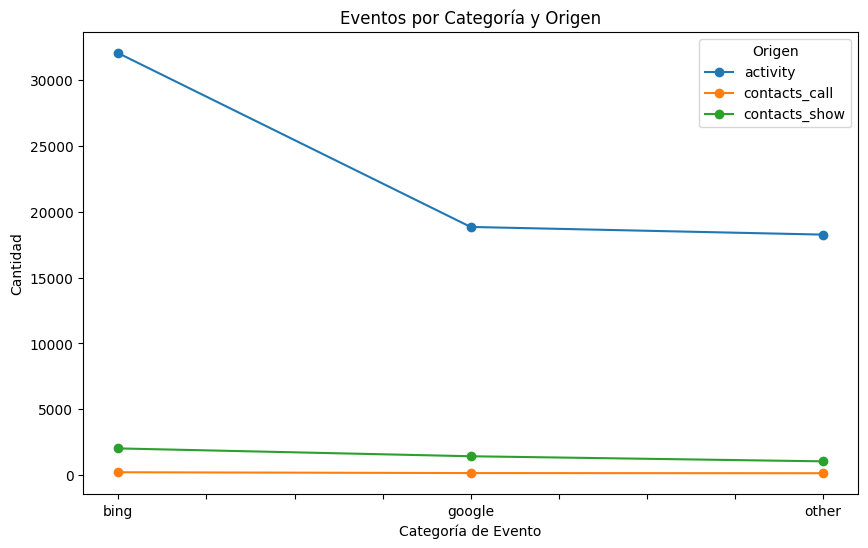

In [33]:
# Graficar usando Pandas
ax = df_transposed.plot(kind='line', marker='o', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Eventos por Categoría y Origen')
plt.xlabel('Categoría de Evento')
plt.ylabel('Cantidad')
plt.legend(title='Origen')

# Mostrar el gráfico
plt.show()

## Número de usuarios únicos en cada categoría

In [34]:
events_full_data.head()

,event.time,event.name,user_id,source,event_category
0,2019-10-07,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,activity
1,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,activity
2,2019-10-07,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing,activity
3,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,activity
4,2019-10-07,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing,activity


In [57]:
# Crear la tabla dinámica
table_02 = pd.pivot_table(events_full_data, 
                             values='user_id', 
                             index='event_category', 
                             columns='source', 
                             aggfunc=pd.Series.nunique, 
                             fill_value=0)

print(table_02)

source          bing  google  other
event_category                     
activity        1910    1111   1214
contacts_call     92      67     54
contacts_show    478     275    228


In [58]:
dataset_02 = table_02.reset_index()

In [59]:
# Configurar el DataFrame para tener 'event_category' como índice
dataset_02.set_index('event_category', inplace=True)
dataset_02

source,bing,google,other
event_category,,,
activity,1910,1111,1214
contacts_call,92,67,54
contacts_show,478,275,228


<div class="alert alert-block alert-info">

De esta forma se determino cuántos usuarios llegaron a una cada etapa del embudo
</div>

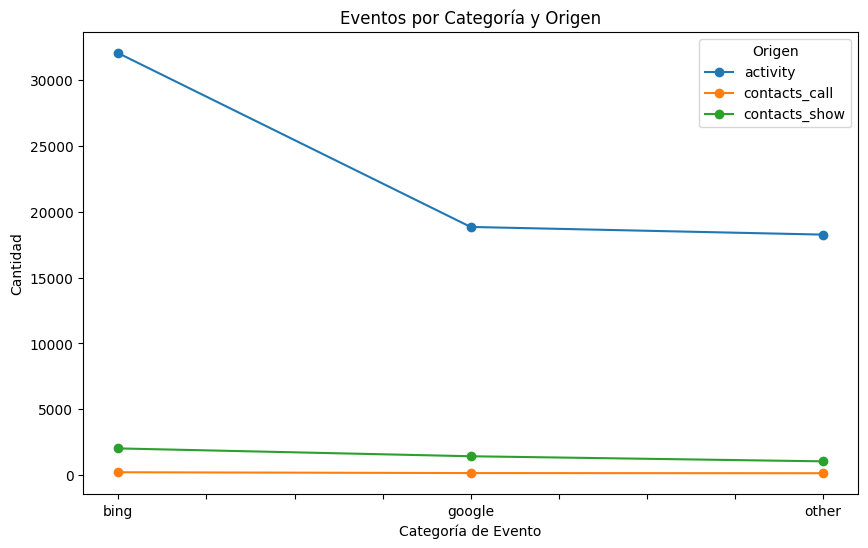

In [60]:
# Transponer el DataFrame
df2_transposed = dataset_02.transpose()

# Graficar usando Pandas
ax = df_transposed.plot(kind='line', marker='o', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Eventos por Categoría y Origen')
plt.xlabel('Categoría de Evento')
plt.ylabel('Cantidad')
plt.legend(title='Origen')

# Mostrar el gráfico
plt.show()

In [61]:
dataset_02

source,bing,google,other
event_category,,,
activity,1910,1111,1214
contacts_call,92,67,54
contacts_show,478,275,228


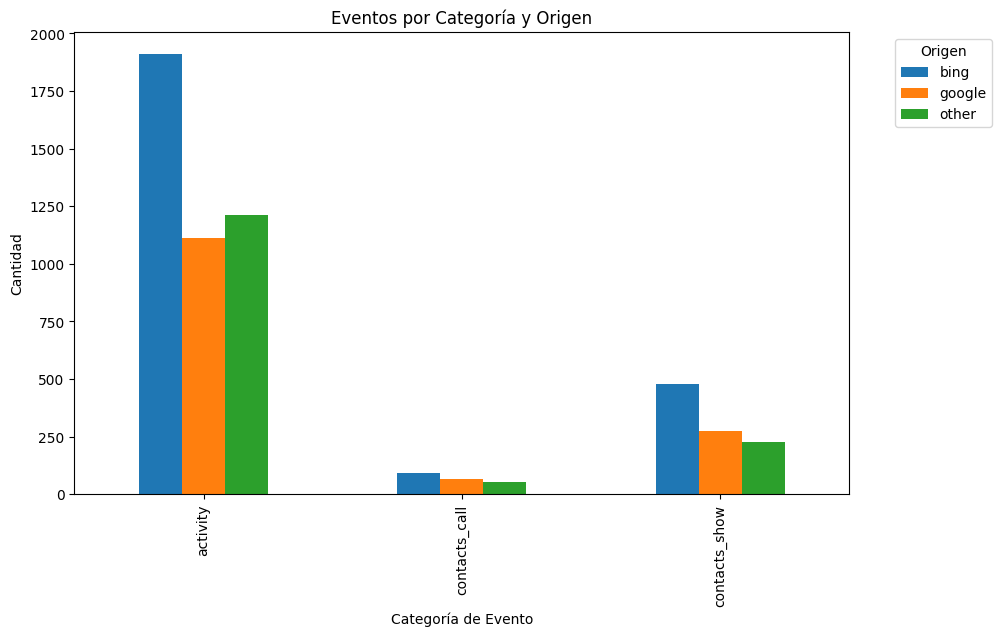

In [62]:
# Graficar usando Pandas
ax = dataset_02.plot(kind='bar', stacked=False, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Eventos por Categoría y Origen')
plt.xlabel('Categoría de Evento')
plt.ylabel('Cantidad')
plt.legend(title='Origen', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

In [63]:
dataset_02t = dataset_02.copy()
dataset_02t['total'] = dataset_02t[['bing', 'google', 'other']].sum(axis=1)
dataset_02t = dataset_02t.sort_values(by='total', ascending=False)
dataset_02t

source,bing,google,other,total
event_category,,,,
activity,1910,1111,1214,4235
contacts_show,478,275,228,981
contacts_call,92,67,54,213


## Usuarios por fuente

In [50]:
# Cantidad de usuarios por fuente
print(sources['source'].value_counts())
print('---------------------')
print(sources['source'].value_counts().sum())
print(len(sources['source']))

source
bing      1934
other     1230
google    1129
Name: count, dtype: int64
---------------------
4293
4293


<div class="alert alert-block alert-danger">

* Usuarios por fuente,
* Cantidad de usuarios únicos por fuente,
* Graficar cantidad de usuarios únicos por fuente,
* Cantidad de usuarios únicos a nivel general y desglosados por fuente de adquisición,
* totales por evento,
* Agrupación de eventos por fuente de adquisición,
* Histograma de eventos promedio por usuario (desglosado por fuente de adquisición),
* Cantidad de eventos a través del tiempo (agrupando diariamente/semanalmente, desglosado por fuente de adquisición),
* Para los eventos más populares, cantidad de eventos a través del tiempo,
* Adquisión de usuarios,
* Eventos más populares (gráfico de barras con conteo de eventos, desglosado por fuente de adquisición)
</div>


# Métricas

In [ ]:
import pandas as pd

def calcular_proporciones(dataset, event_categories, reference_event='advert_open'):
    # Filtrar las filas correspondientes a la categoría de referencia
    reference_row = dataset[dataset['event_category'] == reference_event]

    # Obtener los valores de las columnas para la categoría de referencia
    reference_values = reference_row[['bing', 'google', 'other']].values[0]

    # Inicializar un DataFrame vacío para almacenar las proporciones
    proporciones_df = pd.DataFrame(columns=['bing', 'google', 'other'])

    # Calcular las proporciones para cada categoría de evento
    for event_category in event_categories:
        if event_category != reference_event:
            proporciones = dataset[dataset['event_category'] == event_category][['bing', 'google', 'other']] / reference_values
            proporciones_df = pd.concat([proporciones_df, proporciones], ignore_index=True)

    # Imprimir las proporciones
    print(f"Proporciones en función de '{reference_event}':")
    print(proporciones_df)

# Uso con dataset
eventos_interesantes = ['activity', 'contacts_show', 'contacts_call']
calcular_proporciones(dataset_01, eventos_interesantes)


## 2. Tiempo dedicado a la aplicación

In [ ]:
events_full_data.info()

In [ ]:
events_full_data.tail()

In [ ]:
# Crear la tabla de usuarios con la fecha y hora de primer ingreso
first_table = events_full_data.groupby('user_id')['event.time'].min().reset_index()
first_table.columns = ['user_id', 'first_login']
first_table

In [ ]:
# Crear la tabla de usuarios con la fecha y hora de último ingreso
last_table = events_full_data.groupby('user_id')['event.time'].max().reset_index()
last_table.columns = ['user_id', 'last_login']
last_table

In [ ]:
# Merge de las dos tablas solo para los usuarios que tienen información en ambas tablas
consolidated_table = pd.merge(first_table, last_table, on='user_id', how='inner')

# Calcula la diferencia en tiempo entre 'first_login' y 'last_login'
consolidated_table['time_difference'] = consolidated_table['last_login'] - consolidated_table['first_login']
consolidated_table

In [ ]:
# Merge con la tabla 'sources' para agregar la información del origen del usuario
consolidated_table = pd.merge(consolidated_table, sources, on='user_id', how='left')
consolidated_table

In [ ]:
# Generar tabla dinámica para calcular el total de 'time_difference' por 'source'
pivot_table = consolidated_table.pivot_table(values='time_difference', index='source', aggfunc='sum')

# Renombrar la columna para mayor claridad
pivot_table.columns = ['total_time_difference']

pivot_table

In [ ]:
# Contar la cantidad de usuarios por 'source'
user_count = consolidated_table.groupby('source')['user_id'].nunique().reset_index()
user_count.columns = ['source', 'user_count']

# Agregar la columna de cantidad de usuarios a la tabla dinámica
pivot_table = pd.merge(pivot_table, user_count, on='source', how='left')

# Calcular el promedio de tiempo dedicado por cada usuario
pivot_table['average_time_per_user'] = pivot_table['total_time_difference'] / pivot_table['user_count']

pivot_table

## 1. Tasas de retención

In [ ]:
events_full_data['event.name'].unique()

In [ ]:
events_full_data.info()

In [ ]:
events_full_data.tail()

In [ ]:
# Filtrar eventos de inicio de sesión (advert_open)
login_events = events_full_data[events_full_data['event.name'] == 'advert_open'].copy()
login_events.tail()

In [ ]:
# Obtener la lista de user_id que realizaron el evento de inicio de sesión
login_users = login_events['user_id'].tolist()
login_users

In [ ]:
# Crear una nueva columna para el día del evento de inicio de sesión
login_events.loc[:, 'login_day'] = login_events['event.time'].dt.date
login_events

In [ ]:
# Filtrar eventos posteriores al inicio de sesión
subsequent_events = events_full_data[events_full_data['user_id'].isin(login_users)].copy()
subsequent_events

In [ ]:
# Crear una nueva columna para el día de cada evento posterior al inicio de sesión
subsequent_events.loc[:, 'event_day'] = subsequent_events['event.time'].dt.date

# Calcular la tasa de retención por día
retention_data = subsequent_events.groupby(['login_day', 'event_day']).agg({'user_id': 'nunique'}).reset_index()
retention_data['retention_rate'] = retention_data['user_id'] / len(login_users) * 100

# Filtrar eventos del día del inicio de sesión
retention_data = retention_data[retention_data['login_day'] == retention_data['event_day']]

# Imprimir el DataFrame resultante
print(retention_data)

## 4. Conversión en evento destino
Ahora se va a determinar cuantos usuarios pasaron de una etapa a la siguiente.

Para tal efecto, se debe:
1. Encontrar la hora exacta en que se dio un paso en particular por primera vez para c/usuario.
2. Encontrar a los que dieron los pasos en el orden deseado.

In [67]:
events_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event.time      74197 non-null  object
 1   event.name      74197 non-null  object
 2   user_id         74197 non-null  object
 3   source          74197 non-null  object
 4   event_category  74197 non-null  object
dtypes: object(5)
memory usage: 2.8+ MB


In [68]:
tabla_03 = events_full_data.pivot_table(index='user_id', columns='event_category', values='event.time',aggfunc='min') 
tabla_03.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4293 entries, 0001b1d5-b74a-4cbf-aeb0-7df5947bf349 to fffb9e79-b927-4dbb-9b48-7fd09b23a62b
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   activity       4235 non-null   object
 1   contacts_call  213 non-null    object
 2   contacts_show  981 non-null    object
dtypes: object(3)
memory usage: 134.2+ KB


In [69]:
events_full_data[events_full_data['user_id']=='00551e79-152e-4441-9cf7-565d7eb04090'].sort_values(by='event.time', ascending=True)

,event.time,event.name,user_id,source,event_category
47688,2019-10-25,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_show
47689,2019-10-25,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_call
55802,2019-10-28,search_1,00551e79-152e-4441-9cf7-565d7eb04090,bing,activity
55811,2019-10-28,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_show
55813,2019-10-28,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_call
55844,2019-10-28,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_show
55845,2019-10-28,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_call
58047,2019-10-29,photos_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,activity


In [70]:
tabla_03

event_category,activity,contacts_call,contacts_show
user_id,,,
0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,NaN,NaN
00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-20,2019-10-20
00463033-5717-4bf1-91b4-09183923b9df,2019-11-01,NaN,NaN
004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18,NaN,NaN
00551e79-152e-4441-9cf7-565d7eb04090,2019-10-28,2019-10-25,2019-10-25
...,...,...,...
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13,NaN,NaN
ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07,NaN,2019-10-07
ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23,NaN,NaN


In [71]:
# Convertir en dataframe
tabla_03.reset_index(inplace = True)
tabla_03.head()

event_category,user_id,activity,contacts_call,contacts_show
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,NaN,NaN
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-20,2019-10-20
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01,NaN,NaN
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18,NaN,NaN
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-28,2019-10-25,2019-10-25


### Forma 1

In [83]:
# Calcula número de filas en tabla_03 donde la columna 'activity' no es nula y 
# almacena ese número en la variable users_activity.
users_activity = tabla_03[~tabla_03['activity'].isna()].shape[0]
print('Visitantes con actividad:', users_activity)

# se usa el atributo shape para obtener las dimensiones del DataFrame resultante después de aplicar el filtro. 
# En este caso, se accede al componente [0], que representa el número de filas en el DataFrame resultante.

Visitantes con actividad: 4235


In [100]:
# calcula el número de filas en tabla_03 donde columna 'activity' no es nula y columna 'contacts_show' es mayor que columna 'activity',
# y almacena ese número en la variable users_contact_show.

users_contact_show = tabla_03[~tabla_03['activity'].isna() & (tabla_03['contacts_show'] >= tabla_03['activity'])].shape[0]
print('Vieron la página de contactos:', users_contact_show)

Vieron la página de contactos: 898


In [101]:
users_contact_call = tabla_03[~tabla_03['activity'].isna() & (tabla_03['contacts_show'] >= tabla_03['activity'])& (tabla_03['contacts_call'] >= tabla_03['contacts_show'])].shape[0]
print('llamaron:', users_contact_call)

llamaron: 170


In [113]:
# Crear un diccionario con los nombres de las variables y sus valores
data = {
    'Variable': ['users_activity', 'users_contact_show', 'users_contact_call'],
    'Valor': [users_activity, users_contact_show, users_contact_call]
}

# Crear el DataFrame
dataframe_03a = pd.DataFrame(data)

print(dataframe_03a)

             Variable  Valor
0      users_activity   4235
1  users_contact_show    898
2  users_contact_call    170


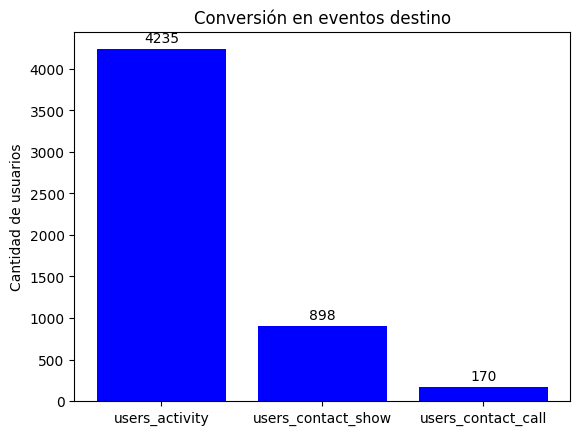

In [115]:
# Crear el gráfico de barras
plt.bar(dataframe_03['Variable'], dataframe_03['Valor'], color='blue')

plt.ylabel('Cantidad de usuarios')
plt.title('Conversión en eventos destino')

# Agregar los valores en las barras
for i, value in enumerate(dataframe_03['Valor']):
    plt.text(i, value + 50, str(value), ha='center', va='bottom')


In [98]:
df_users_contact_show = tabla_03[~tabla_03['activity'].isna() & (tabla_03['contacts_show'] > tabla_03['activity'])]
df_users_contact_show

event_category,user_id,activity,contacts_call,contacts_show
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-20,2019-10-20
6,005fbea5-2678-406f-88a6-fbe9787e2268,2019-10-11,NaN,2019-10-11
11,007d031d-5018-4e02-b7ee-72a30609173f,2019-10-22,NaN,2019-10-22
13,00a93a72-3bbc-4ee7-8a81-7134f45ae009,2019-10-11,NaN,2019-10-11
20,0103a07d-513f-42b9-8d91-d5891d5655fe,2019-11-03,NaN,2019-11-03
...,...,...,...,...
4282,fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5,2019-10-26,NaN,2019-10-26
4284,ff1554b5-919e-40b1-90bb-ee1f7f6d5846,2019-10-21,2019-10-21,2019-10-21
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07,NaN,2019-10-07
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21,NaN,2019-10-22


In [99]:
df_users_contact_call = tabla_03[~tabla_03['activity'].isna() & (tabla_03['contacts_show'] >= tabla_03['activity'])& (tabla_03['contacts_call'] >= tabla_03['contacts_show'])]
df_users_contact_call

event_category,user_id,activity,contacts_call,contacts_show
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-20,2019-10-20
24,01556e76-d389-43bd-9fc7-1a3ba9802f49,2019-10-10,2019-10-10,2019-10-10
25,01585246-7d9b-4e03-a465-095d5b891b0a,2019-10-17,2019-10-17,2019-10-17
53,037c3a07-9382-41ef-881a-90b6a55eaa9b,2019-10-30,2019-10-30,2019-10-30
112,06d168a5-79d3-45ad-906e-872ef5de936f,2019-10-12,2019-10-15,2019-10-15
...,...,...,...,...
4224,fbd5d690-e3bf-4be6-9415-750c2fb59475,2019-10-18,2019-10-21,2019-10-21
4251,fd0bc38a-3c2d-4d12-9de2-b6b52c17177c,2019-10-26,2019-10-26,2019-10-26
4253,fd20080d-e8a0-4d2c-95dc-ac0f9e144793,2019-10-12,2019-10-12,2019-10-12
4256,fd624b3c-563c-4459-a681-9a6ddc11549d,2019-10-31,2019-10-31,2019-10-31


### Forma 2

In [75]:
# genera un df donde con los campos de 'activity' no nulos
step_1 = ~tabla_03['activity'].isna()                            
num_activity = tabla_03[step_1].shape[0]
num_activity

4235

In [76]:
# genera un df donde fecha 'contacts_show' > fecha 'activity'
step_2 = step_1 & (tabla_03['contacts_show'] > tabla_03['activity'])  
num_contacts_show = tabla_03[step_2].shape[0]
num_contacts_show

237

In [77]:
step_2

0       False
1        True
2       False
3       False
4       False
        ...  
4288    False
4289    False
4290    False
4291     True
4292     True
Length: 4293, dtype: bool

In [78]:
tabla_03.head()

event_category,user_id,activity,contacts_call,contacts_show
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,NaN,NaN
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-20,2019-10-20
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01,NaN,NaN
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18,NaN,NaN
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-28,2019-10-25,2019-10-25


In [79]:
# genera un df donde fecha 'contacts_call' > fecha 'contacts_show'
step_3 = step_2 & (tabla_03['contacts_call'] > tabla_03['contacts_show'])  
num_contacts_call = tabla_03[step_3].shape[0]
num_contacts_call

4

### Revisión de un caso atípico 

Grupo de registros para un usuario donde las actividades son posteriores a los eventos destino

In [81]:
# grupo de registros para un usuario donde las actividades son posteriores a los eventos destino
events_full_data[events_full_data['user_id']=='00551e79-152e-4441-9cf7-565d7eb04090'].sort_values(by='event.time', ascending=True)

,event.time,event.name,user_id,source,event_category
47688,2019-10-25,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_show
47689,2019-10-25,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_call
55802,2019-10-28,search_1,00551e79-152e-4441-9cf7-565d7eb04090,bing,activity
55811,2019-10-28,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_show
55813,2019-10-28,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_call
55844,2019-10-28,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_show
55845,2019-10-28,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_call
58047,2019-10-29,photos_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,activity


<div class="alert alert-block alert-danger">

¿Cómo se explica la primera actividad tuvo lugar despues de contacts?
</div>

<div class="alert alert-block alert-info">

Al parecer se perdió información del ingreso diario de los usuarios a la plataforma, la información no fue entregada o dicha información no se recopiló.

Se sugiere confirmar el origen de la ausencia de dicha información con el grupo que suministró os dataframes.
</div>

In [45]:
events_full_data[events_full_data['user_id']=='00551e79-152e-4441-9cf7-565d7eb04090'].sort_values(by='event.time', ascending=True)

,event.time,event.name,user_id,source,event_category
47688,2019-10-25,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_show
47689,2019-10-25,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_call
55802,2019-10-28,search_1,00551e79-152e-4441-9cf7-565d7eb04090,bing,activity
55811,2019-10-28,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_show
55813,2019-10-28,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_call
55844,2019-10-28,contacts_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_show
55845,2019-10-28,contacts_call,00551e79-152e-4441-9cf7-565d7eb04090,bing,contacts_call
58047,2019-10-29,photos_show,00551e79-152e-4441-9cf7-565d7eb04090,bing,activity


<div class="alert alert-block alert-warning">
</div>
<div class="alert alert-block alert-warning">
</div>
<div class="alert alert-block alert-warning">
</div>

<div class="alert alert-block alert-danger">

* Usuarios por fuente,
* Cantidad de usuarios únicos por fuente,
* Graficar cantidad de usuarios únicos por fuente,
* Cantidad de usuarios únicos a nivel general y desglosados por fuente de adquisición,
* totales por evento,
* Agrupación de eventos por fuente de adquisición,
* Histograma de eventos promedio por usuario (desglosado por fuente de adquisición),
* Cantidad de eventos a través del tiempo (agrupando diariamente/semanalmente, desglosado por fuente de adquisición),
* Para los eventos más populares, cantidad de eventos a través del tiempo,
* Adquisión de usuarios,
* Eventos más populares (gráfico de barras con conteo de eventos, desglosado por fuente de adquisición)
</div>


# Teoría: Propuestas

## Análisis exploratorio a mobile_dataset_us
* replantear objetivo: tasa de retención o tasa de éxito → embudo → conversión en el evento de destino, contacts_show o contact_calls.
* tiempo dedicado a la aplicación por usuario, en promedio considerando totales (eventos y usuarios)
* frecuencia de ocurrencia de eventos
    * cantidad de eventos realizados por cada usuario
    * cantidad de eventos realizados en general


## Usuarios por fuente
* Cantidad de usuarios únicos por fuente, 
* Graficar cantidad de usuarios únicos por fuente.


## Análisis exploratorio a dataset combinado
* Cantidad de usuarios únicos a nivel general y desglosados por fuente de adquisición,
* totales por evento,
* Agrupación de eventos por fuente de adquisición,
* Histograma de eventos promedio por usuario (desglosado por fuente de adquisición),
* Cantidad de eventos a través del tiempo (agrupando diariamente/semanalmente, desglosado por fuente de adquisición),
* Para los eventos más populares, cantidad de eventos a través del tiempo,
* Adquisión de usuarios,
* Eventos más populares (gráfico de barras con conteo de eventos, desglosado por fuente de adquisición)

## Segmentar a los usuarios
* Construir métricas de interacción (engagement) (e.g., % de eventos en fin de semana, % de eventos en la mañana/tarde/noche, cantidad de eventos, número de días distintos que un usuario realizó un evento, número de eventos por tipo de evento)
* graficar un scatter matrix para identificar visualmente si existe una separación por grupos
* usar un algoritmo de clusterización (K means, KNN, t-SNE, UMAP, etc.) para crear segmentos

## Otras estadísticas
* Generales
* para quienes SI hicieron conversiones destino
* para quienes NO hicieron conversiones destino
* Por fecha
* Por fuente (Source)



### Pruebas de hipótesis
* prueba de hipótesis de la tarea,
* conversión a otros eventos,
* conversión entre segmentos creados en la sección anterior,
* curvas de retención semanales con diferentes eventos (o con todos).



# Conclusiones

## Fuentes de información

Establecer diferencia entre tipos de usuarios ya que siempre se habla de ellos bajo un solo término cuando en realidad hay:
1. Oferentes
2. Exploradores/Consumidores

Lo más importante es medir las transacciones económicas, para lamentar que no haya información al respecto a las ventas

## Objetivos

Considero que la referencia para las métricas deben ser las actividades "contacts_call", la cual creo que es la última actividad en la secuencia de eventos.
Si el direccionamiento es trabajar en función de la actividad "contacts_show" es muy probable que el lider de este proyecto en particular haya sido parte de un proceso intermedio en el nogocio que soló quiere medir su impacto sin considerar que puede aportar a la cadena de valor de la empresa.


# Bibilografía

Bootcamp Data Analyst. SPRINT 07. Lección METRICAS Y EMBUDOS. Tema: Embudos de producto simples

